## Import Library

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import numpy as np
import re
import json

## Gathering Data

In [2]:
# Gathering Data
from google.colab import drive
drive.mount('/content/drive')
# import dataset yang dibutuhkan dan berikan nama "indonesian_food_df"
indonesian_food_df = pd.read_csv("/content/drive/MyDrive/capstone dataset/indonesia_products.csv")
indonesian_food_df.head()

Mounted at /content/drive


,code,product_name,brands,countries_tags,categories_tags,labels_tags,ingredients_text,quantity,energy_100g,energy-from-fat_100g,...,sugars_100g,added-sugars_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,serum-proteins_100g,salt_100g,added-salt_100g,net_weight_g
0,1174723303,NaN,Dua Kelinci,"en:indonesia,en:netherlands,en:philippines,en:...","en:plant-based-foods-and-beverages,en:plant-ba...",en:dua-kelinci,Peanuts (96%),180,627.6,NaN,...,0.0,NaN,3.00,NaN,NaN,8.00,NaN,0.3375,NaN,NaN
1,35014,White Bread,Mr. Bread,en:indonesia,"en:plant-based-foods-and-beverages,en:plant-ba...",en:halal,"_Wheat Flour_-52.66%, ice, water, margarine...",350g,879.0,NaN,...,3.0,NaN,NaN,NaN,NaN,7.00,NaN,0.3100,NaN,350.0
2,11747233033,Kacang Dua Kelinci,Dua Kelincii,"en:indonesia,en:netherlands,en:saudi-arabia,en...","en:plant-based-foods-and-beverages,en:plant-ba...",en:halal,Kacang Tanah (96%),180 g,2510.0,NaN,...,0.0,NaN,12.00,NaN,NaN,32.00,NaN,1.3500,NaN,180.0
3,11747233965,Kacang Garing,Dua Kelinci,en:indonesia,id:kacang,NaN,"kacang (96%), Garam.",13g,2580.0,NaN,...,0.0,NaN,NaN,NaN,NaN,30.80,NaN,0.5380,NaN,13.0
4,127233,Fruit cologne lemon,UW Health,en:indonesia,NaN,NaN,NaN,4,513.0,NaN,...,NaN,NaN,1.05,NaN,NaN,2.09,NaN,NaN,NaN,NaN


In [ ]:
# Menampilkan informasi dataset
indonesian_food_df.info()
# Menampilkan statistik deskriptif
indonesian_food_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      1084 non-null   int64  
 1   product_name              1033 non-null   object 
 2   brands                    876 non-null    object 
 3   countries_tags            1084 non-null   object 
 4   categories_tags           400 non-null    object 
 5   labels_tags               345 non-null    object 
 6   ingredients_text          395 non-null    object 
 7   quantity                  497 non-null    object 
 8   energy_100g               1067 non-null   float64
 9   energy-from-fat_100g      19 non-null     float64
 10  fat_100g                  1030 non-null   float64
 11  saturated-fat_100g        845 non-null    float64
 12  unsaturated-fat_100g      0 non-null      float64
 13  monounsaturated-fat_100g  20 non-null     float64
 14  omega-9-

,code,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,...,sugars_100g,added-sugars_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,serum-proteins_100g,salt_100g,added-salt_100g,net_weight_g
count,1.084000e+03,1067.000000,19.000000,1030.000000,845.000000,0.0,20.000000,0.0,17.000000,6.000000,...,925.000000,15.00000,519.000000,0.0,0.0,1013.000000,0.0,782.000000,0.0,288.000000
mean,7.522591e+12,1114.973941,376.105263,13.830834,6.738709,NaN,3.967525,NaN,1.220829,68.633983,...,14.861783,6.96400,3.994049,NaN,NaN,8.243618,NaN,12.345171,NaN,176.802083
std,3.032801e+12,838.631115,445.855469,19.967791,10.307791,NaN,5.435976,NaN,1.264635,147.989672,...,36.653034,7.96909,6.552461,NaN,NaN,12.957380,NaN,164.791568,NaN,223.034190
min,3.501400e+04,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,...,0.000000,0.00000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,4.000000
25%,8.858742e+12,334.000000,73.500000,2.000000,0.700000,NaN,0.391250,NaN,0.000000,0.020975,...,3.000000,2.12500,0.000000,NaN,NaN,1.666667,NaN,0.060000,NaN,50.000000
50%,8.993020e+12,1040.000000,146.000000,7.000000,3.000000,NaN,2.250000,NaN,0.800000,1.399450,...,7.400000,5.00000,2.500000,NaN,NaN,5.000000,NaN,0.277500,NaN,100.000000
75%,8.997033e+12,1860.000000,558.500000,20.000000,9.000000,NaN,5.477500,NaN,2.000000,30.682500,...,18.000000,7.25000,5.000000,NaN,NaN,9.600000,NaN,1.300000,NaN,200.000000
max,9.557240e+12,3770.000000,1510.000000,350.000000,89.000000,NaN,22.500000,NaN,3.750000,369.000000,...,1000.000000,28.80000,70.000000,NaN,NaN,90.900000,NaN,3825.000000,NaN,2270.000000


In [4]:
# Pilih kolom yang relevan untuk OCR PackFacts
selected_columns = [
    'product_name', 'brands', 'quantity',
    'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
    'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'omega-9-fat_100g',
    'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'trans-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'added-sugars_100g',
    'soluble-fiber_100g', 'insoluble-fiber_100g', 'fiber_100g',
    'proteins_100g', 'serum-proteins_100g', 'salt_100g', 'added-salt_100g',
    'net_weight_g'
]

df_selected = indonesian_food_df[selected_columns]
# Menampilkan 5 data pertama
print (df_selected.head())
# Menampilkan informasi dataset
df_selected.info()
# Menampilkan statistik deskriptif
df_selected.describe()

          product_name        brands quantity  energy_100g  \
0                  NaN   Dua Kelinci      180        627.6   
1          White Bread     Mr. Bread     350g        879.0   
2   Kacang Dua Kelinci  Dua Kelincii    180 g       2510.0   
3        Kacang Garing   Dua Kelinci      13g       2580.0   
4  Fruit cologne lemon     UW Health        4        513.0   

   energy-from-fat_100g  fat_100g  saturated-fat_100g  unsaturated-fat_100g  \
0                   NaN     12.00                2.50                   NaN   
1                   NaN      4.00                2.00                   NaN   
2                   NaN     48.00               10.00                   NaN   
3                   NaN     46.20               11.50                   NaN   
4                   NaN      6.81                4.19                   NaN   

   monounsaturated-fat_100g  omega-9-fat_100g  ...  sugars_100g  \
0                       NaN               NaN  ...          0.0   
1                 

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,...,sugars_100g,added-sugars_100g,soluble-fiber_100g,insoluble-fiber_100g,fiber_100g,proteins_100g,serum-proteins_100g,salt_100g,added-salt_100g,net_weight_g
count,1067.000000,19.000000,1030.000000,845.000000,0.0,20.000000,0.0,17.000000,6.000000,1.000,...,925.000000,15.00000,0.0,0.0,519.000000,1013.000000,0.0,782.000000,0.0,288.000000
mean,1114.973941,376.105263,13.830834,6.738709,NaN,3.967525,NaN,1.220829,68.633983,0.025,...,14.861783,6.96400,NaN,NaN,3.994049,8.243618,NaN,12.345171,NaN,176.802083
std,838.631115,445.855469,19.967791,10.307791,NaN,5.435976,NaN,1.264635,147.989672,NaN,...,36.653034,7.96909,NaN,NaN,6.552461,12.957380,NaN,164.791568,NaN,223.034190
min,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.025,...,0.000000,0.00000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,4.000000
25%,334.000000,73.500000,2.000000,0.700000,NaN,0.391250,NaN,0.000000,0.020975,0.025,...,3.000000,2.12500,NaN,NaN,0.000000,1.666667,NaN,0.060000,NaN,50.000000
50%,1040.000000,146.000000,7.000000,3.000000,NaN,2.250000,NaN,0.800000,1.399450,0.025,...,7.400000,5.00000,NaN,NaN,2.500000,5.000000,NaN,0.277500,NaN,100.000000
75%,1860.000000,558.500000,20.000000,9.000000,NaN,5.477500,NaN,2.000000,30.682500,0.025,...,18.000000,7.25000,NaN,NaN,5.000000,9.600000,NaN,1.300000,NaN,200.000000
max,3770.000000,1510.000000,350.000000,89.000000,NaN,22.500000,NaN,3.750000,369.000000,0.025,...,1000.000000,28.80000,NaN,NaN,70.000000,90.900000,NaN,3825.000000,NaN,2270.000000


In [5]:
# Tampilkan jumlah missing values per kolom
print("Missing values per kolom:")
print(df_selected.isna().sum())

# Cek duplikat berdasarkan kolom product_name dan ingredients_text
print("\nJumlah data duplikat berdasarkan 'product_name' dan 'brands':")
print(df_selected.duplicated(subset=['product_name', 'brands']).sum())

# Tampilkan beberapa contoh duplikat
print("\nContoh data duplikat:")
print(df_selected[df_selected.duplicated(subset=['product_name'], keep=False)].sort_values(by=['product_name']).head(10))

Missing values per kolom:
product_name                  51
brands                       208
quantity                     587
energy_100g                   17
energy-from-fat_100g        1065
fat_100g                      54
saturated-fat_100g           239
unsaturated-fat_100g        1084
monounsaturated-fat_100g    1064
omega-9-fat_100g            1084
polyunsaturated-fat_100g    1067
omega-3-fat_100g            1078
omega-6-fat_100g            1083
trans-fat_100g              1014
carbohydrates_100g            26
sugars_100g                  159
added-sugars_100g           1069
soluble-fiber_100g          1084
insoluble-fiber_100g        1084
fiber_100g                   565
proteins_100g                 71
serum-proteins_100g         1084
salt_100g                    302
added-salt_100g             1084
net_weight_g                 796
dtype: int64

Jumlah data duplikat berdasarkan 'product_name' dan 'brands':
32

Contoh data duplikat:
                 product_name         brands qu

## Preprocessing Data

In [10]:

# Bersihkan spasi & ubah ke lowercase agar konsisten
df_cleaned.columns = df_cleaned.columns.str.strip()  # Hapus spasi nama kolom
df_cleaned['product_name'] = df_cleaned['product_name'].str.strip().str.lower()
df_cleaned['brands'] = df_cleaned['brands'].fillna('').astype(str).str.strip().str.lower()

# Isi missing 'brands' dari 'product_name' dan sebaliknya
df_cleaned['brands'] = np.where(df_cleaned['brands'] == '', df_cleaned['product_name'], df_cleaned['brands'])
df_cleaned['product_name'] = np.where(df_cleaned['product_name'] == '', df_cleaned['brands'], df_cleaned['product_name'])

# Hapus duplikat berdasarkan 'product_name' (nama produk unik)
df_cleaned = df_cleaned.drop_duplicates(subset='product_name', keep='first')

# Ekstrak angka dari kolom 'quantity' (misalnya '100g' → 100)
def extract_quantity(val):
    if pd.isna(val):
        return np.nan
    match = re.search(r'\d+', str(val))
    return int(match.group()) if match else np.nan

df_cleaned['quantity'] = df_cleaned['quantity'].apply(extract_quantity)

# Isi missing pada 'quantity' dengan modus (angka terbanyak)
quantity_mode = df_cleaned['quantity'].mode()[0]
df_cleaned['quantity'] = df_cleaned['quantity'].fillna(quantity_mode).astype(int)

# Tangani missing 'net_weight_g' dengan rata-rata, ubah ke integer ---
df_cleaned['net_weight_g'] = df_cleaned['net_weight_g'].fillna(df_cleaned['net_weight_g'].mean()).astype(int)

# Isi missing nilai nutrisi dengan nilai modus per kolom (bukan 0 atau -1) ---
numeric_cols = [
    'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
    'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'omega-9-fat_100g',
    'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'trans-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'added-sugars_100g',
    'soluble-fiber_100g', 'insoluble-fiber_100g', 'fiber_100g',
    'proteins_100g', 'serum-proteins_100g', 'salt_100g', 'added-salt_100g',
]

for col in numeric_cols:
    if col in df_cleaned.columns:
        mode_val = df_cleaned[col].mode()
        if not mode_val.empty:
            df_cleaned[col] = df_cleaned[col].fillna(mode_val[0])
        else:
            df_cleaned[col] = df_cleaned[col].fillna(0)  # Jika tidak ada modus, isi 0
# Final cek tipe data dan bentuk dataset
print(df_cleaned.info())
print(df_cleaned.describe())
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 1 to 1083
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_name              982 non-null    object 
 1   brands                    982 non-null    object 
 2   quantity                  982 non-null    int64  
 3   energy_100g               982 non-null    float64
 4   energy-from-fat_100g      982 non-null    float64
 5   fat_100g                  982 non-null    float64
 6   saturated-fat_100g        982 non-null    float64
 7   unsaturated-fat_100g      982 non-null    float64
 8   monounsaturated-fat_100g  982 non-null    float64
 9   omega-9-fat_100g          982 non-null    float64
 10  polyunsaturated-fat_100g  982 non-null    float64
 11  omega-3-fat_100g          982 non-null    float64
 12  omega-6-fat_100g          982 non-null    float64
 13  trans-fat_100g            982 non-null    float64
 14  carbohydrates_

          quantity  energy_100g  energy-from-fat_100g    fat_100g  \
count   982.000000   982.000000            982.000000  982.000000   
mean     67.160896  1111.697205              6.164969   12.879548   
std     144.211231   834.545175             79.648087   19.494643   
min       1.000000    -1.000000             -1.000000   -1.000000   
25%       1.000000   334.000000             -1.000000    1.500000   
50%       1.000000  1043.500000             -1.000000    6.030000   
75%      70.000000  1859.500000             -1.000000   19.350000   
max    1000.000000  3770.000000           1510.000000  350.000000   

       saturated-fat_100g  unsaturated-fat_100g  monounsaturated-fat_100g  \
count          982.000000                 982.0                982.000000   
mean             4.897710                  -1.0                 -0.898828   
std              9.127989                   0.0                  1.032066   
min             -1.000000                  -1.0                 -1.000

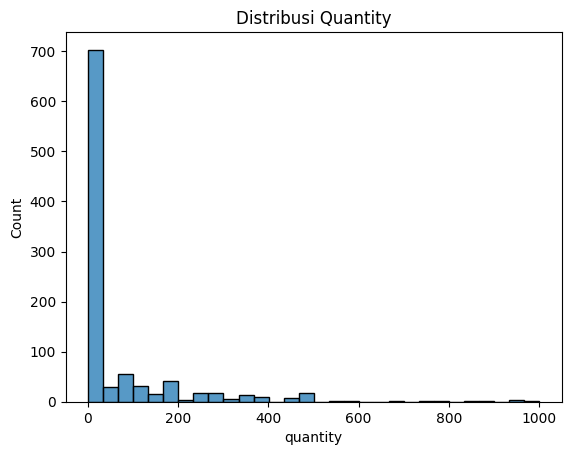

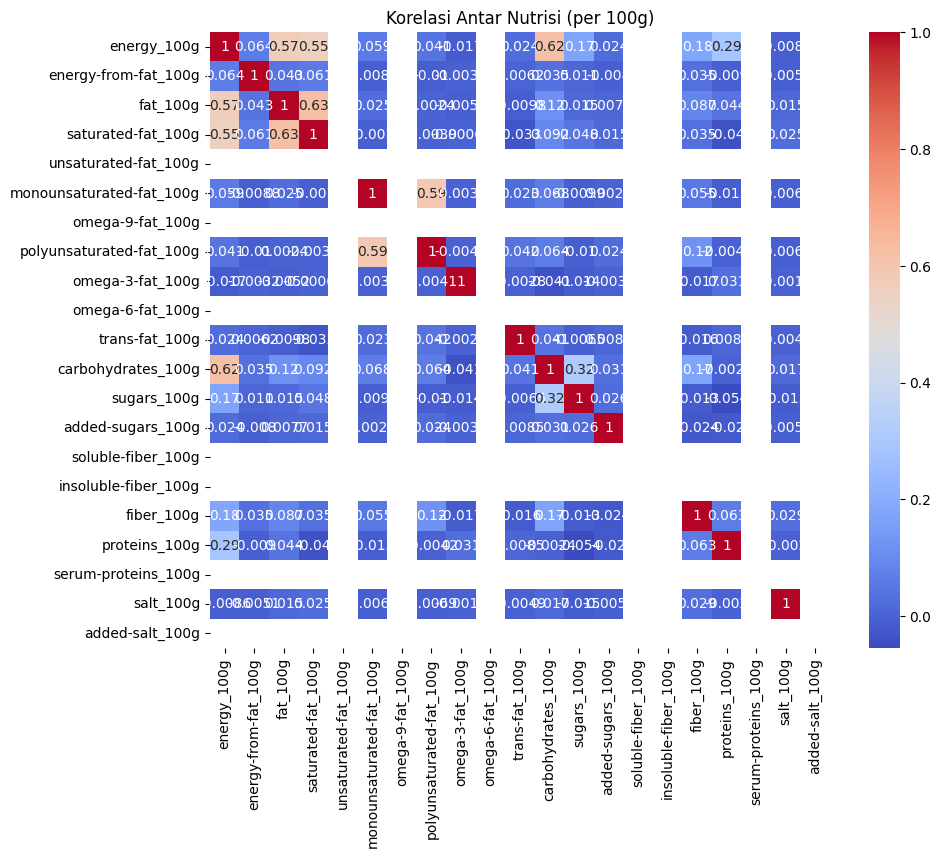

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print(df_cleaned.describe())

# Distribusi kuantitas produk
sns.histplot(df_cleaned['quantity'], bins=30)
plt.title('Distribusi Quantity')
plt.show()

# Korelasi antar nutrisi
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Nutrisi (per 100g)')
plt.show()

In [12]:
# Threshold sederhana (contoh, bisa disesuaikan berdasarkan standar WHO)
df_cleaned['high_sugar'] = df_cleaned['sugars_100g'] > 15
df_cleaned['high_salt'] = df_cleaned['salt_100g'] > 1.5


brands
indomie                                20
frisian flag                           13
sari roti                              12
greenfields                            12
cimory                                  9
elle & vire,elle&vire international     8
abc                                     8
wings food                              7
fiesta                                  7
oatside                                 6
Name: count, dtype: int64


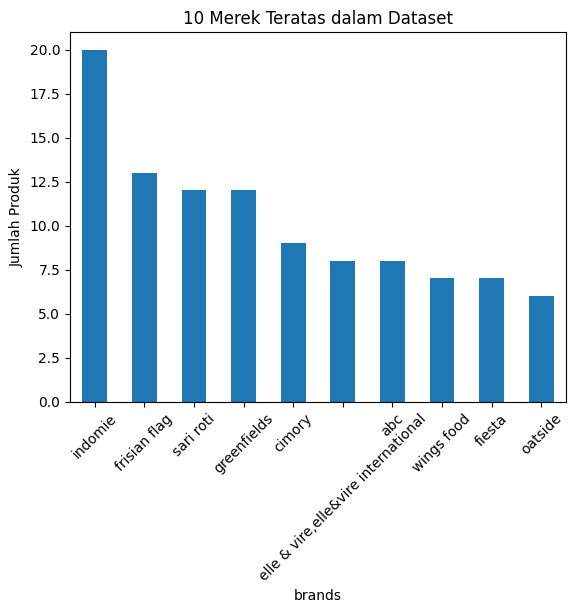

In [13]:
# 10 merek teratas
top_brands = df_cleaned['brands'].value_counts().head(10)
print(top_brands)

# Plot
top_brands.plot(kind='bar')
plt.title('10 Merek Teratas dalam Dataset')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Simpan Datset CSV
df_cleaned.to_csv('cleaned_food_data.csv', index=False)

## Konversi Ke Json

In [15]:
#  konversi ke JSON
processed_data = []
for _, row in df_cleaned.iterrows():
    entry = {
        "product_name": row['product_name'],
        "brand": row['brands'],
        "quantity_g": row['quantity'],
        "nutrients": {
            "energy_100g": row['energy_100g'],
            "fat_100g": row['fat_100g'],
            "saturated_fat_100g": row['saturated-fat_100g'],
            "carbohydrates_100g": row['carbohydrates_100g'],
            "sugars_100g": row['sugars_100g'],
            "fiber_100g": row['fiber_100g'],
            "proteins_100g": row['proteins_100g'],
            "salt_100g": row['salt_100g']
        }
    }
    processed_data.append(entry)

output_file = 'packfacts_ocr_dataset.json'
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(processed_data, f, indent=2, ensure_ascii=False)

print(f"\nFile JSON berhasil dibuat: {output_file}")


File JSON berhasil dibuat: packfacts_ocr_dataset.json
